<a href="https://colab.research.google.com/github/kylefrankel/scraping/blob/main/DMML_Missing_Topic_Investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hw: Data Scraping and Manipulation


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from scipy.stats import entropy
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from IPython import display
import networkx as nx
from datetime import date
from collections import Counter
from operator import itemgetter

We decided to look at how to webscrape tweets from Twitter, since we thought it would be interesting to look at live data. The tutorial we decided to use is the following:
https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1

In [ ]:
!pip install tweepy

In [ ]:
import json

from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import StreamListener

class Listener(StreamListener):
  
   def on_data(self, data):
      
        all_data = json.loads(data)

        tweet = all_data.get("text")
        print(tweet)
        return True

In [ ]:
import os
import tweepy as tweepy
import pandas as pd

In [ ]:
#Tutorial starts with this line of code and ends at Challenge 1.
# Code needed to authorize credentials to utilize its API
# Credentials gathered by signing up on Twitter https://developer.twitter.com/en/portal/apps/17727689/keys
consumer_key= "xxxxxxxxxxx"
consumer_secret = "xxxxxxxxxx"
access_token= 'xxxxxxxxxxxxxxxxxx'
access_token_secret = "xxxxxxxxxxxxxxxxxxxx"



#stream.filter(track=['google'])


In [ ]:
# Further code needed to authorize our credentials and access the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
# We scraped the 15 most recent tweets for username Jack 
username = 'jack'
count = 15
try:     
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.user_timeline,id=username).items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 tweets_df = pd.DataFrame(tweets_list)
except BaseException as e:
      print('failed on_status,',str(e))
      time.sleep(3)

tweets_df

In [ ]:
#We scraped the 15 most recent tweets related to the 2020 US Election
text_query = '2020 US Election'
count = 15
try:
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.search,q=text_query).items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 tweets_df = pd.DataFrame(tweets_list)
 
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)
tweets_df

,0,1,2
0,2021-04-24 17:48:17,1386014144554434560,RT @Dino_Veletanlic: Donald Trump told us the ...
1,2021-04-24 17:47:04,1386013837695008772,RT @Dino_Veletanlic: Donald Trump told us the ...
2,2021-04-24 17:46:43,1386013751875301378,RT @Dino_Veletanlic: Donald Trump told us the ...
3,2021-04-24 17:45:27,1386013430264393731,RT @Dino_Veletanlic: Donald Trump told us the ...
4,2021-04-24 17:44:33,1386013206347272198,RT @Dino_Veletanlic: Donald Trump told us the ...
5,2021-04-24 17:44:29,1386013187691229189,RT @Dino_Veletanlic: Donald Trump told us the ...
6,2021-04-24 17:44:09,1386013104689999872,RT @Dino_Veletanlic: Donald Trump told us the ...
7,2021-04-24 17:43:58,1386013058175180802,RT @Dino_Veletanlic: Donald Trump told us the ...
8,2021-04-24 17:43:20,1386012896451198977,RT @Dino_Veletanlic: Donald Trump told us the ...
9,2021-04-24 17:42:13,1386012616007438336,@DavidJHarrisJr https://t.co/RvPyP2a8MU


In [ ]:
#We wanted to get more information, so we added the tweet the user is associated with and how many favorites the tweet 
# had at the time it was retrived
tweets = tweepy.Cursor(api.search, q=text_query).items(count)
# Pulling information from tweets iterable 
tweets_list = [[tweet.created_at, tweet.id, tweet.text, tweet.user, tweet.favorite_count] for tweet in tweets]
# Creation of dataframe from tweets list
tweets_df = pd.DataFrame(tweets_list)
tweets_df

,0,1,2,3,4
0,2021-04-24 17:48:17,1386014144554434560,RT @Dino_Veletanlic: Donald Trump told us the ...,User(_api=<tweepy.api.API object at 0x7fa2a7f3...,0
1,2021-04-24 17:47:04,1386013837695008772,RT @Dino_Veletanlic: Donald Trump told us the ...,User(_api=<tweepy.api.API object at 0x7fa2a7f3...,0
2,2021-04-24 17:46:43,1386013751875301378,RT @Dino_Veletanlic: Donald Trump told us the ...,User(_api=<tweepy.api.API object at 0x7fa2a7f3...,0
3,2021-04-24 17:45:27,1386013430264393731,RT @Dino_Veletanlic: Donald Trump told us the ...,User(_api=<tweepy.api.API object at 0x7fa2a7f3...,0
4,2021-04-24 17:44:33,1386013206347272198,RT @Dino_Veletanlic: Donald Trump told us the ...,User(_api=<tweepy.api.API object at 0x7fa2a7f3...,0
5,2021-04-24 17:44:29,1386013187691229189,RT @Dino_Veletanlic: Donald Trump told us the ...,User(_api=<tweepy.api.API object at 0x7fa2a7f3...,0
6,2021-04-24 17:44:09,1386013104689999872,RT @Dino_Veletanlic: Donald Trump told us the ...,User(_api=<tweepy.api.API object at 0x7fa2a7f3...,0
7,2021-04-24 17:43:58,1386013058175180802,RT @Dino_Veletanlic: Donald Trump told us the ...,User(_api=<tweepy.api.API object at 0x7fa2a7f3...,0
8,2021-04-24 17:43:20,1386012896451198977,RT @Dino_Veletanlic: Donald Trump told us the ...,User(_api=<tweepy.api.API object at 0x7fa2a7f3...,0
9,2021-04-24 17:42:13,1386012616007438336,@DavidJHarrisJr https://t.co/RvPyP2a8MU,User(_api=<tweepy.api.API object at 0x7fa2a7f3...,0


In [ ]:
#Challenge 1. How to export the last 7 days of data mentioning @attentive to a
#a csv file
tweets = []

count = 1

"""Twitter will automatically sample the last 7 days of data. Depending on how many total tweets there are with the specific hashtag, keyword, handle, or key phrase that you are looking for, you can set the date back further by adding since= as one of the parameters. You can also manually add in the number of tweets you want to get back in the items() section."""

for tweet in tweepy.Cursor(api.search, q="@attentive", count=450, since='2020-02-28').items(50000):
	
	print(count)
	count += 1

	try: 
		data = [tweet.created_at, tweet.id, tweet.text, tweet.user._json['screen_name'], tweet.user._json['name'], tweet.user._json['created_at'], tweet.entities['urls']]
		data = tuple(data)
		tweets.append(data)

	except tweepy.TweepError as e:
		print(e.reason)
		continue

	except StopIteration:
		break

df = pd.DataFrame(tweets, columns = ['created_at','tweet_id', 'tweet_text', 'screen_name', 'name', 'account_creation_date', 'urls'])
df.to_csv(r'twitter.csv',index=False)




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [ ]:
# Question 1. What are the most common words used in tweets that mentions "Mass Shootings" for the 150 most recent tweets?
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
#We scraped the 150 most recent tweets related to Mass Shootings
text_query = 'Mass Shootings'
count = 150
try:
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.search,q=text_query).items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 tweets_df = pd.DataFrame(tweets_list)
 
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)
tweets_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


,0,1,2
0,2021-04-24 17:48:19,1386014154276933635,RT @nowthisnews: Dr. Fauci declared gun violence a public health issue in the wake of dozens of mass shootings in recent weeks https://t.co…
1,2021-04-24 17:48:14,1386014131896135681,RT @nowthisnews: Dr. Fauci declared gun violence a public health issue in the wake of dozens of mass shootings in recent weeks https://t.co…
2,2021-04-24 17:48:02,1386014079098269704,RT @FidelisToJusti1: It doesn't have to this way. It shouldn't be this way. Mass shootings need not be as common as traffic accidents or th…
3,2021-04-24 17:47:52,1386014041160798217,"Crazy how mass shootings can be discussed like it’s nothing. Three other people sitting there, not even shocked."
4,2021-04-24 17:47:44,1386014006733721602,"RT @Sky_Lee_1: 159 MASS SHOOTINGS IN 113 DAYS! \n\n#GunViolence has killed a total of 13,366 to date.\n\nEvery day we don’t do something is ano…"
5,2021-04-24 17:47:34,1386013964673368065,"RT @Sky_Lee_1: 159 MASS SHOOTINGS IN 113 DAYS! \n\n#GunViolence has killed a total of 13,366 to date.\n\nEvery day we don’t do something is ano…"
6,2021-04-24 17:47:33,1386013960768417795,"RT @Sky_Lee_1: 159 MASS SHOOTINGS IN 113 DAYS! \n\n#GunViolence has killed a total of 13,366 to date.\n\nEvery day we don’t do something is ano…"
7,2021-04-24 17:47:23,1386013918674423811,@ChippieJoshua @larryelder @RepMaxineWaters @washingtonpost And these crazy mass shootings. Crazy world we live in.
8,2021-04-24 17:47:08,1386013854593961985,"RT @NBCNews: Opinion | Lori Ann Post: ""March of 2020 will forever be remembered as the month Covid-19 became a global pandemic. But as a ma…"
9,2021-04-24 17:46:58,1386013810746593281,"RT @Sky_Lee_1: 159 MASS SHOOTINGS IN 113 DAYS! \n\n#GunViolence has killed a total of 13,366 to date.\n\nEvery day we don’t do something is ano…"


(150, 476)
['000', '0prqwmyep7', '111', '113', '12', '13', '130', '156', '159', '19', '2020', '2021', '24', '2awisdom', '366', '50', '500', '5rktx333em', '8d7qz0ldzg', 'abc', 'abiding', 'accidents', 'acting', 'adamschwindt', 'add', 'after', 'agree', 'aimed', 'airport', 'alancaparn', 'alive', 'almost', 'alone', 'also', 'america', 'americans', 'amp', 'angryjoeshow', 'ann', 'ano', 'anyone', 'app', 'areas', 'aren', 'armed', 'aurora', 'away', 'back', 'ban', 'bankruptcy', 'became', 'beginning', 'behind', 'being', 'ben_rosen', 'biggest', 'billreviews', 'black', 'blackknight10k', 'blood', 'bobmcintyre53', 'bomb', 'br14t67mcn', 'california', 'car', 'case', 'caught', 'causing', 'change', 'charging', 'charts', 'check', 'china', 'chippiejoshua', 'citizens', 'cl6zpyehmd', 'close', 'cloth', 'clots', 'cnnbrk', 'coffee', 'coledud317', 'colorado', 'come', 'commit', 'committed', 'common', 'concerned', 'considering', 'contagious', 'control', 'coronavirus', 'countrie', 'country', 'course', 'covered', 'cov

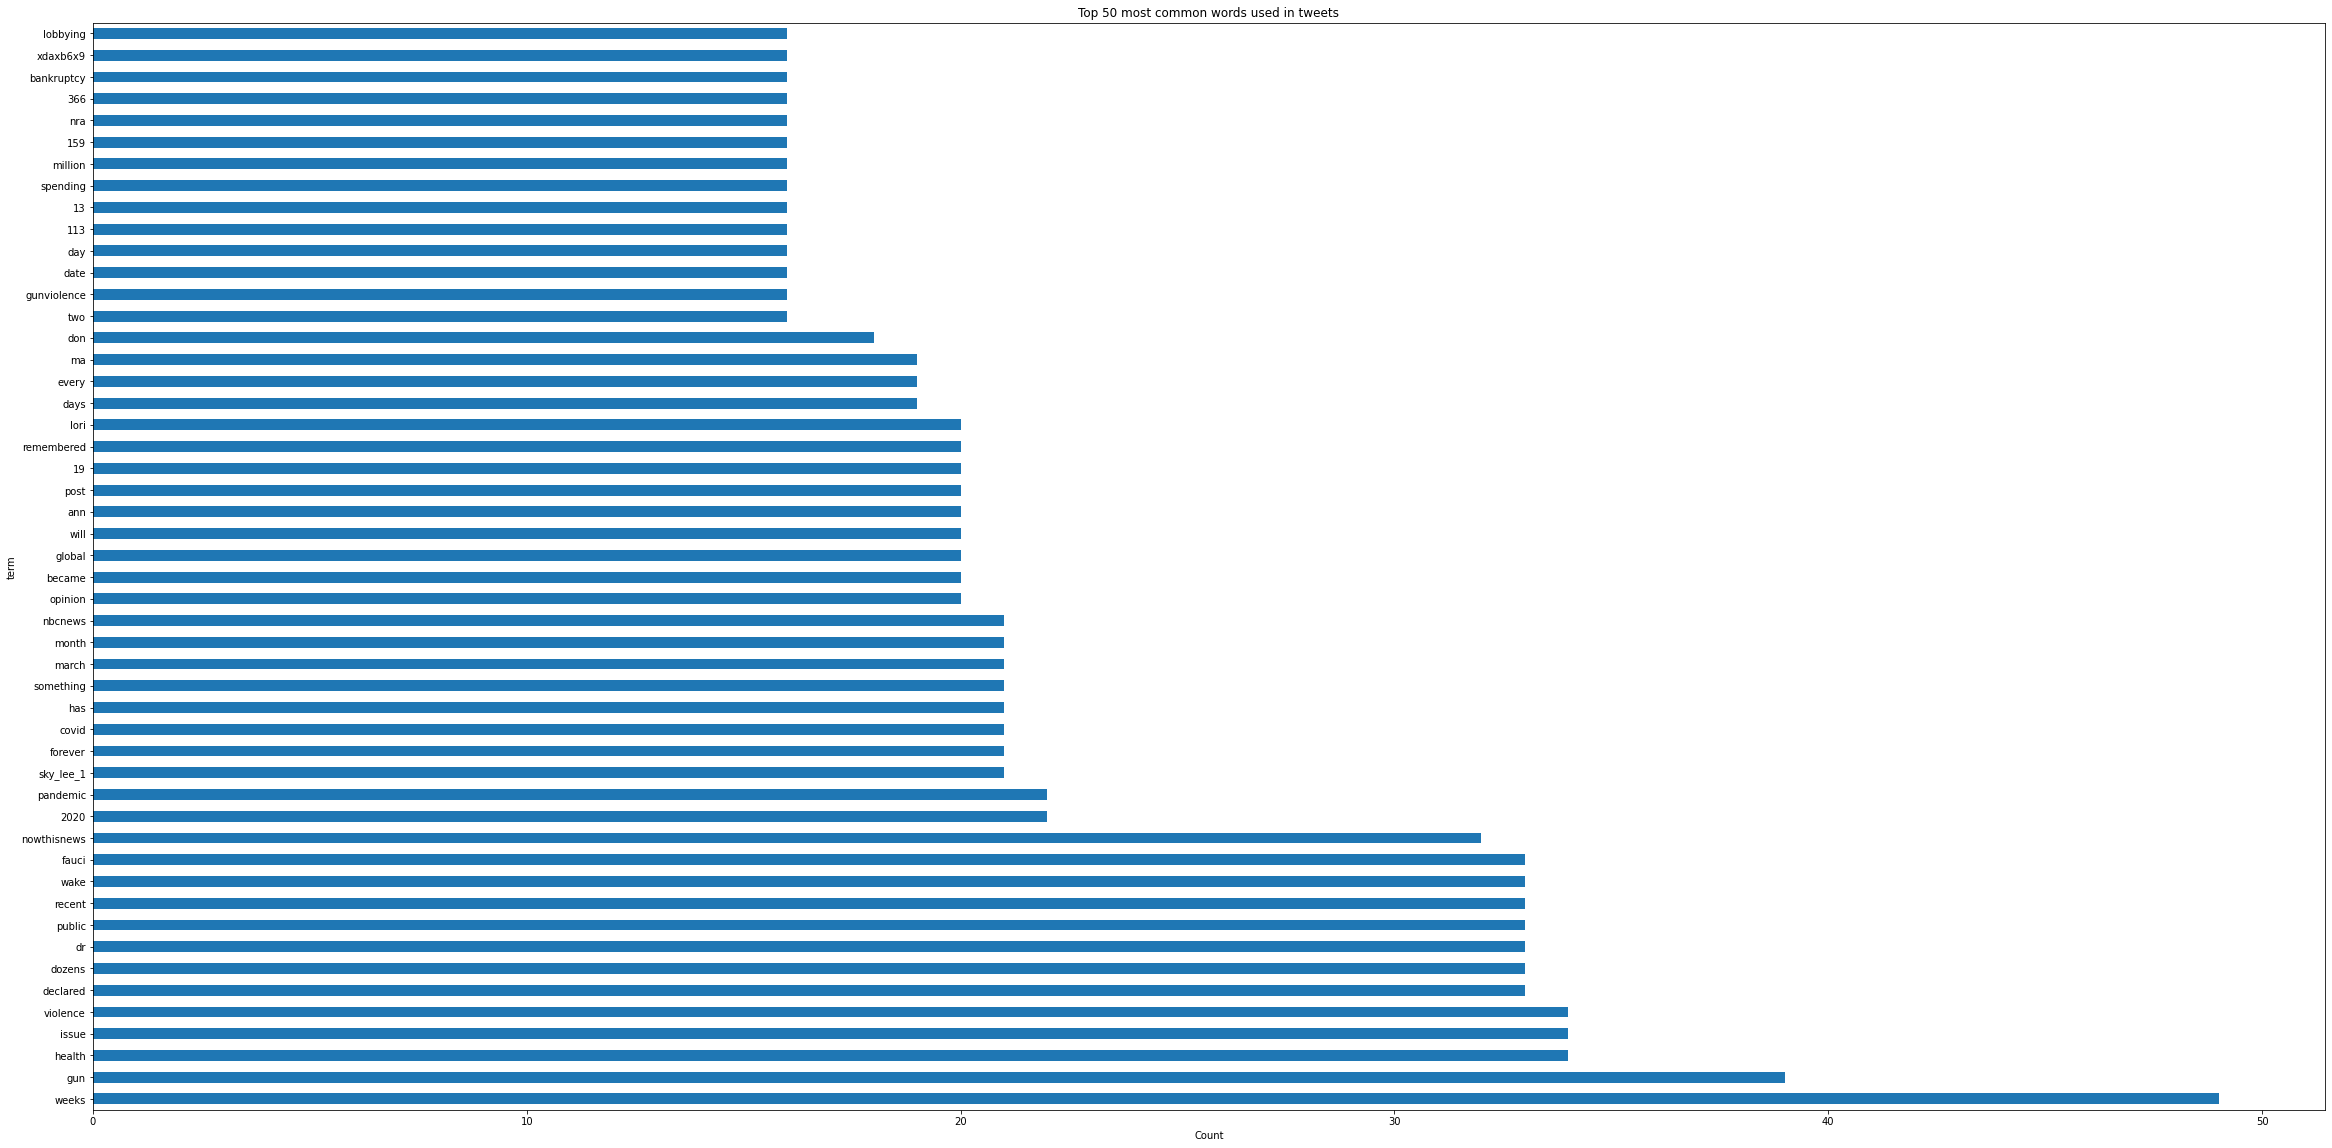

In [ ]:

stop_list = ["mass",'shooting','shootings','a', 'an', 'the', 'it', 'is', 'i', 'and', 'or', 'am', 'are', 'of', 'on', 'to', 'but', 'be', 'that', 'with','so', 
             'in', 'on', 'because', 'believe', 'but', 'find', 'is', 'like', 'and', 'think', "been","for","rt","https","our",
             "we","you","this","your","at","have","may","more","how","what","can","all","by","they","as","do","co","about","just","not"]
count_vect = CountVectorizer(lowercase=True, stop_words=stop_list)
data_counts = count_vect.fit_transform(tweets_df[2])
print(data_counts.shape)
print(count_vect.get_feature_names())
data_counts.todense()
x = count_vect.get_feature_names()
y = np.array(data_counts.todense()).sum(axis=0)
df5 = pd.DataFrame()
df5['term'] = x
df5['count'] = y
df5 = df5.sort_values(by='count',ascending=False)
x=df5.head(50)
x.plot(y='count', x='term', kind='barh', legend=None,figsize=(40,20))
plt.xlabel('Count')
plt.title('Top 50 most common words used in tweets')
plt.show()

Even though the answer to this question contiously changes, after running it several times, it appears that video, gun/guns, and amendements tends to always be in the top 50. 

In [ ]:
#Question 2. Looking at Elon University's 300 most recent tweets, what are their most used hashtags?
username = 'elonuniversity'
count = 300
try:     
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.user_timeline,id=username).items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 tweets_df = pd.DataFrame(tweets_list)
except BaseException as e:
      print('failed on_status,',str(e))
      time.sleep(3)

tweets_df

,0,1,2
0,2021-04-24 17:30:00,1386009543684108289,Join us today at 3 p.m. for the Phillips-Perry Black Excellence Awards. Visit https://t.co/s7edX4HvXP as the univer… https://t.co/XAal2orcGW
1,2021-04-23 20:33:00,1385693207573327872,Congratulations to Mariatu Okonofua ‘19 on her selection as a @RappaportCenter fellow! She’s one of 12 students fro… https://t.co/OKFACHdrce
2,2021-04-23 17:24:00,1385645644031741954,"A panel of Elon experts will gather on April 28 at 7 p.m. to discuss race, policing and justice following the convi… https://t.co/3KF1bV9JG4"
3,2021-04-23 13:50:00,1385591789659123712,"Jordan Young ‘22 will spend the summer in the “Star Trek” Command Training Program, a prestigious internship that c… https://t.co/ikqwTmKnxX"
4,2021-04-22 23:31:00,1385375614757064706,"Such a good #EarthDay to be outside for food, fun and music on Elon's campus! 🌎🌳🌎🌳 https://t.co/LtlWYEUJMw"
5,2021-04-22 18:15:00,1385296091294359562,"Along with crunching numbers as a finance major, Matthew Mitten ‘21 works to crush climate change with his apparel… https://t.co/DPuLWYFIIg"
6,2021-04-22 15:59:00,1385261865291292673,Exciting to see #Elon21 Commencement speaker Daniel J. Watts ‘04 (@DWattsWords) on the @TodayShow this morning! The… https://t.co/uxiX0UVLGZ
7,2021-04-22 14:45:00,1385243243349254148,"This #EarthDay, Elon is hosting an address by Carolyn Finney, author of “Black Faces, White Spaces: Reimagining th… https://t.co/LD4GtJ1OvD"
8,2021-04-22 13:45:48,1385228344405417984,RT @ElonFootball: Congrats to @cheek2017 on being named @CAAFootball Scholar-Athlete of the Year!\n\n#AED https://t.co/vJ7xtogRgD
9,2021-04-21 23:44:00,1385016498457092099,"You can hear from Tony nominee Daniel J. Watts '04 at Elon's Commencement next month, but why wait? You can catch h… https://t.co/CSrCsQh4KD"


In [ ]:

tweets_df=tweets_df.rename(columns={2:'texts'})
tweets_df
df_hashtags= pd.DataFrame()
df_hashtags['fulltext'] =tweets_df.texts
df_hashtags['hashtags'] = df_hashtags.fulltext.str.findall(r'#.*?(?=\s|$)')
df_hashtags['liststring'] = [','.join(map(str, l)) for l in df_hashtags['hashtags']]
df_hashtags



,fulltext,hashtags,liststring
0,Join us today at 3 p.m. for the Phillips-Perry Black Excellence Awards. Visit https://t.co/s7edX4HvXP as the univer… https://t.co/XAal2orcGW,[],
1,Congratulations to Mariatu Okonofua ‘19 on her selection as a @RappaportCenter fellow! She’s one of 12 students fro… https://t.co/OKFACHdrce,[],
2,"A panel of Elon experts will gather on April 28 at 7 p.m. to discuss race, policing and justice following the convi… https://t.co/3KF1bV9JG4",[],
3,"Jordan Young ‘22 will spend the summer in the “Star Trek” Command Training Program, a prestigious internship that c… https://t.co/ikqwTmKnxX",[],
4,"Such a good #EarthDay to be outside for food, fun and music on Elon's campus! 🌎🌳🌎🌳 https://t.co/LtlWYEUJMw",[#EarthDay],#EarthDay
5,"Along with crunching numbers as a finance major, Matthew Mitten ‘21 works to crush climate change with his apparel… https://t.co/DPuLWYFIIg",[],
6,Exciting to see #Elon21 Commencement speaker Daniel J. Watts ‘04 (@DWattsWords) on the @TodayShow this morning! The… https://t.co/uxiX0UVLGZ,[#Elon21],#Elon21
7,"This #EarthDay, Elon is hosting an address by Carolyn Finney, author of “Black Faces, White Spaces: Reimagining th… https://t.co/LD4GtJ1OvD","[#EarthDay,]","#EarthDay,"
8,RT @ElonFootball: Congrats to @cheek2017 on being named @CAAFootball Scholar-Athlete of the Year!\n\n#AED https://t.co/vJ7xtogRgD,[#AED],#AED
9,"You can hear from Tony nominee Daniel J. Watts '04 at Elon's Commencement next month, but why wait? You can catch h… https://t.co/CSrCsQh4KD",[],


(300, 50)
['aed', 'anthropology', 'awesomebaby', 'caa', 'caahoo', 'caahoops', 'chauvintrial', 'covidvaccine', 'earthday', 'earthweek', 'elon', 'elon20', 'elon21', 'elonathome', 'eloncomm', 'elonday', 'elonfamily', 'elonhome', 'elonleads', 'elonparents', 'elonreadyresilient', 'elonthon', 'elontop10', 'elonvb', 'euwt', 'everelon', 'faroftheday', 'getyourshot', 'heatrise', 'heatrises', 'ibelong', 'internationalwomensday', 'lawschool', 'longl', 'marchmadness', 'maroonmadness', 'nationalstudentathleteday', 'ncur2021', 'pandemic', 'pfizer', 'phoeni', 'phoenixrising', 'riseup', 'spring', 'takeyourshot', 'team10', 'team108', 'togetherwerise', 'wearpurple', 'yomhashoah']


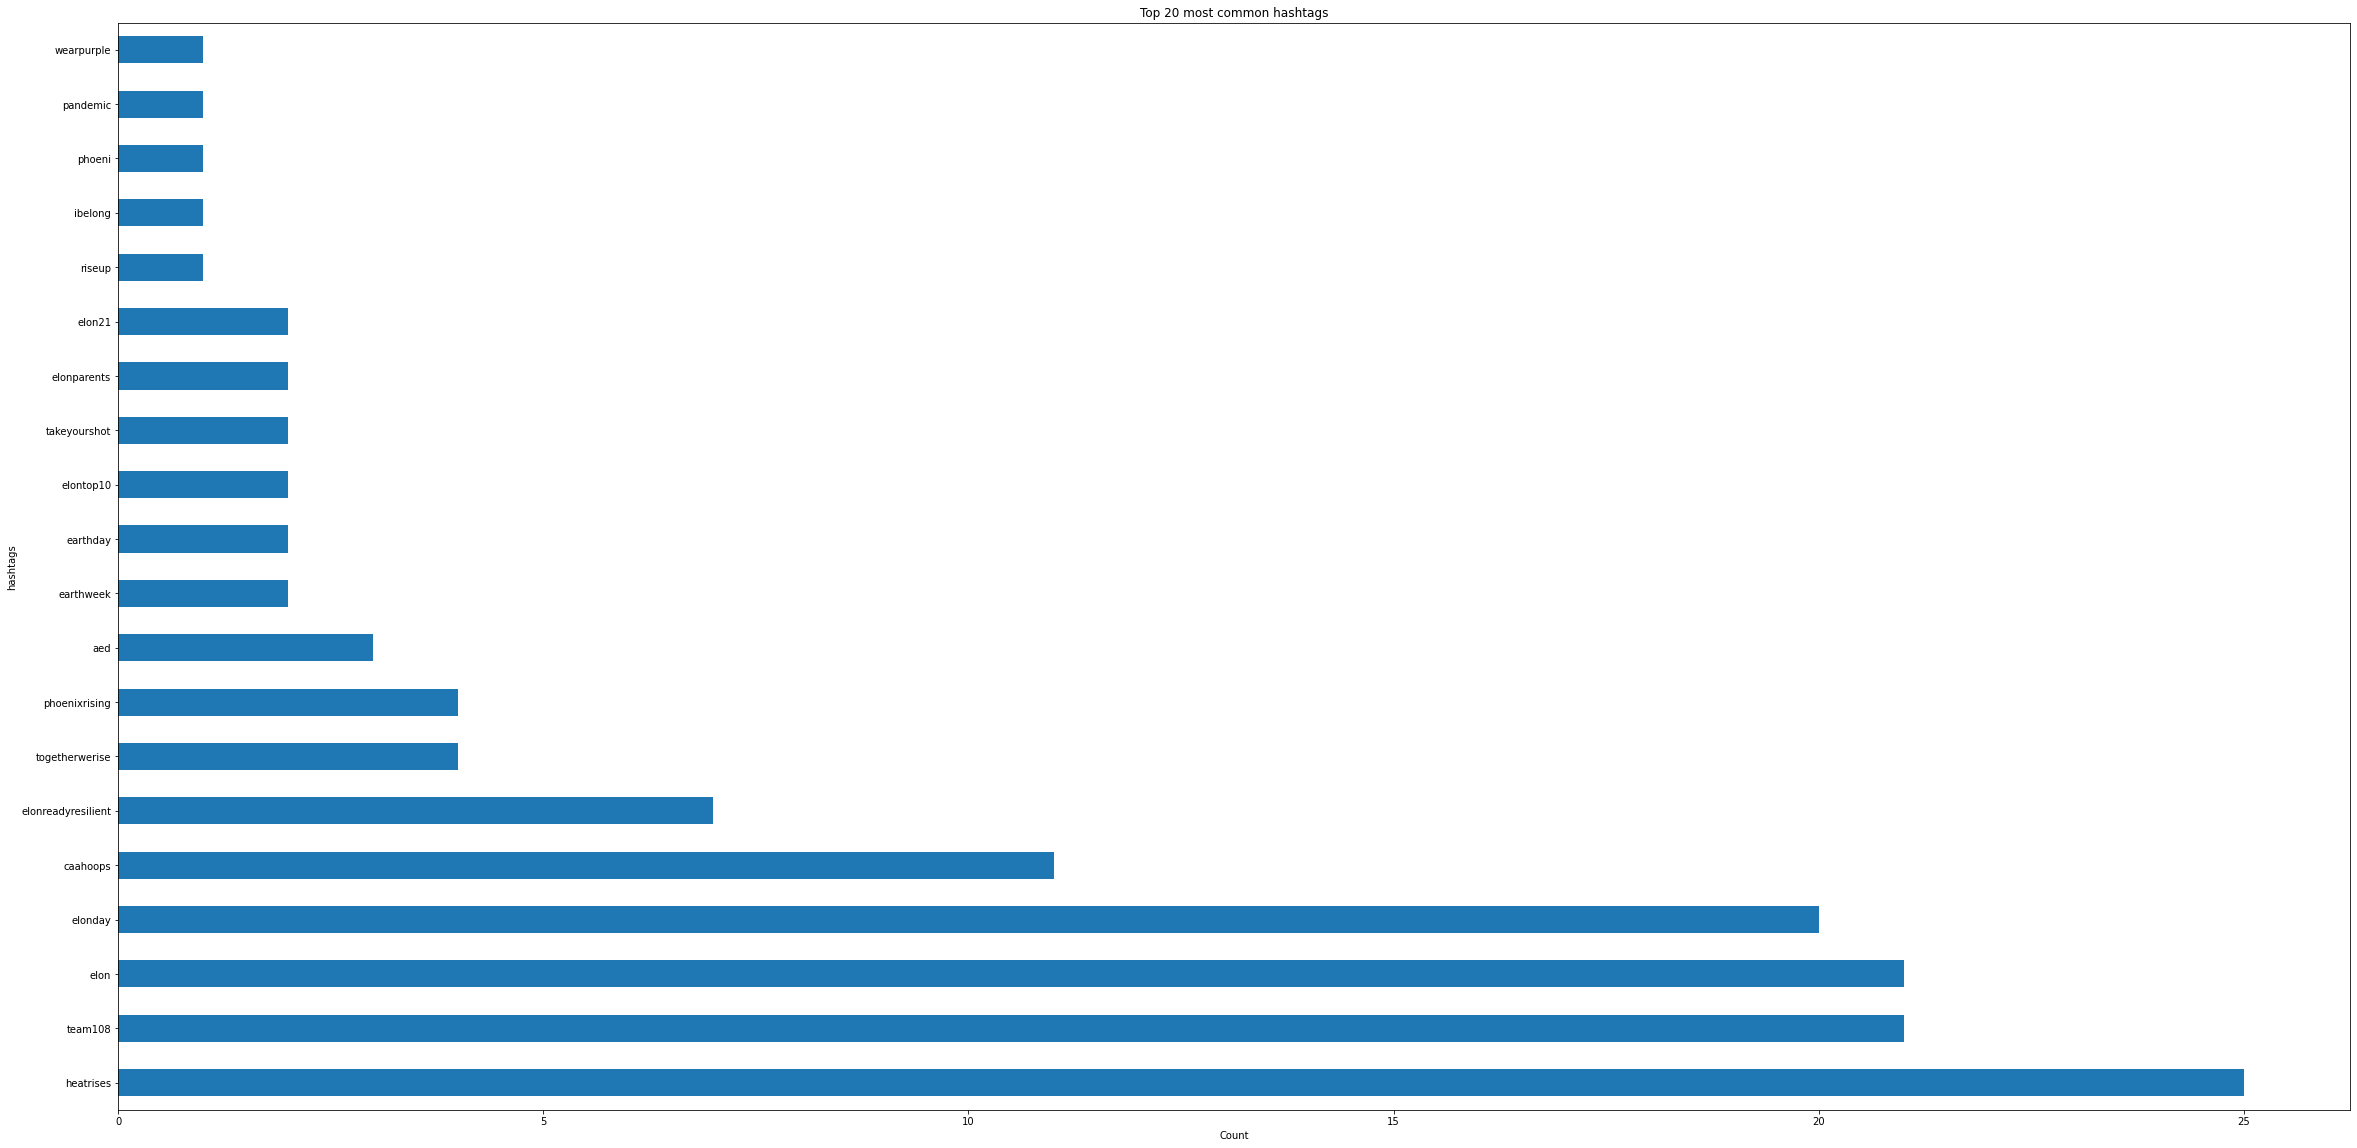

In [ ]:
count_vect1 = CountVectorizer(lowercase=True, stop_words=stop_list)
data_counts1 = count_vect1.fit_transform(df_hashtags['liststring'])
print(data_counts1.shape)
print(count_vect1.get_feature_names())
data_counts1.todense()
x = count_vect1.get_feature_names()
y = np.array(data_counts1.todense()).sum(axis=0)
dfHT = pd.DataFrame()
dfHT['hashtags'] = x
dfHT['count'] = y
dfHT = dfHT.sort_values(by='count',ascending=False)
x=dfHT.head(20)
x.plot(y='count', x='hashtags', kind='barh', legend=None,figsize=(40,20))
plt.xlabel('Count')
plt.title('Top 20 most common hashtags')
plt.show()

It appears that Elon's most popular hashtags recently are heatrises and elon day. However, the closer we get to graduation, it is very likely that the most popular hashtags will be related to graduation. This is because as shown on the graph earthday was a popular hashtag since earth day was April 22. 

In [ ]:
#Question 3. Looking at Toy's R Us tweets from the past year, during which month did they send the most tweets?
username = 'ToysRUs'
count = 751
try:     
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.user_timeline,id=username).items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 tweets_df = pd.DataFrame(tweets_list)
except BaseException as e:
      print('failed on_status,',str(e))
      time.sleep(3)

tweets_df


,0,1,2
0,2021-04-23 13:06:02,1385580726461112320,Swimsuit? Check. Safety goggles? Check. Super big 🍩 floatie? Check! The Bluey Pool Playset includes a #Bluey figure… https://t.co/bL71moWdeb
1,2021-04-22 14:25:02,1385238218958901255,"Celebrate #EarthDay with eco-friendly toys bloomin’ with fun! Teach ’em about sustainability with family favorites,… https://t.co/vNT75bCfyJ"
2,2021-04-21 17:20:05,1384919883411042306,The #RainbowHigh Fashion Studio by @MGA_Ent includes everything they need for a big day of fashionable play! 👗 👠 👚… https://t.co/2j6FmB5bfC
3,2021-04-20 11:55:13,1384475739886653440,"Create a course, load it up with baddies and take ’em down with the LEGO Super Mario Master Your Adventure Maker Ki… https://t.co/HwwceyITbB"
4,2021-04-19 14:58:02,1384159360746549249,"The Warped Forest is teeming with resources, mobs and traps! 🌲🐷💥 The #LEGO Minecraft The Warped Forest includes two… https://t.co/hqE6pyW7Gw"
5,2021-04-16 13:12:01,1383045516515291138,"Their first #scooter comes with a best friend, too! 🐾 The Nickelodeon Blue’s Clues &amp; You Swingin’ Scooter features… https://t.co/gap7n99qeK"
6,2021-04-14 17:10:08,1382380665497399297,Make sweet playtime treats with the Kinetic Sand Scents Ice Cream Treats #playset by @SpinMaster! 🍦 They’ll get one… https://t.co/YaobNPhVy6
7,2021-04-13 11:34:13,1381933740411211779,"Four Barbie Extra #dolls feature colorful, unique #hairstyles, awesome #fashions and 15 accessories. 💖 Pick one up… https://t.co/igVfOU9GLZ"
8,2021-04-12 15:24:02,1381629186633302022,Gear up with the Nerf DinoSquad Stego-Smash Blaster and wield the power of a mighty #dinosaur! 💥 Load up Elite… https://t.co/RMxeAOvaek
9,2021-04-09 13:32:01,1380513835728130048,"What’s Airina’s mood? Look into her eyes and find out! 🌈 FurReal Airina The #Unicorn features color-changing eyes,… https://t.co/e5wDYYWJ1f"


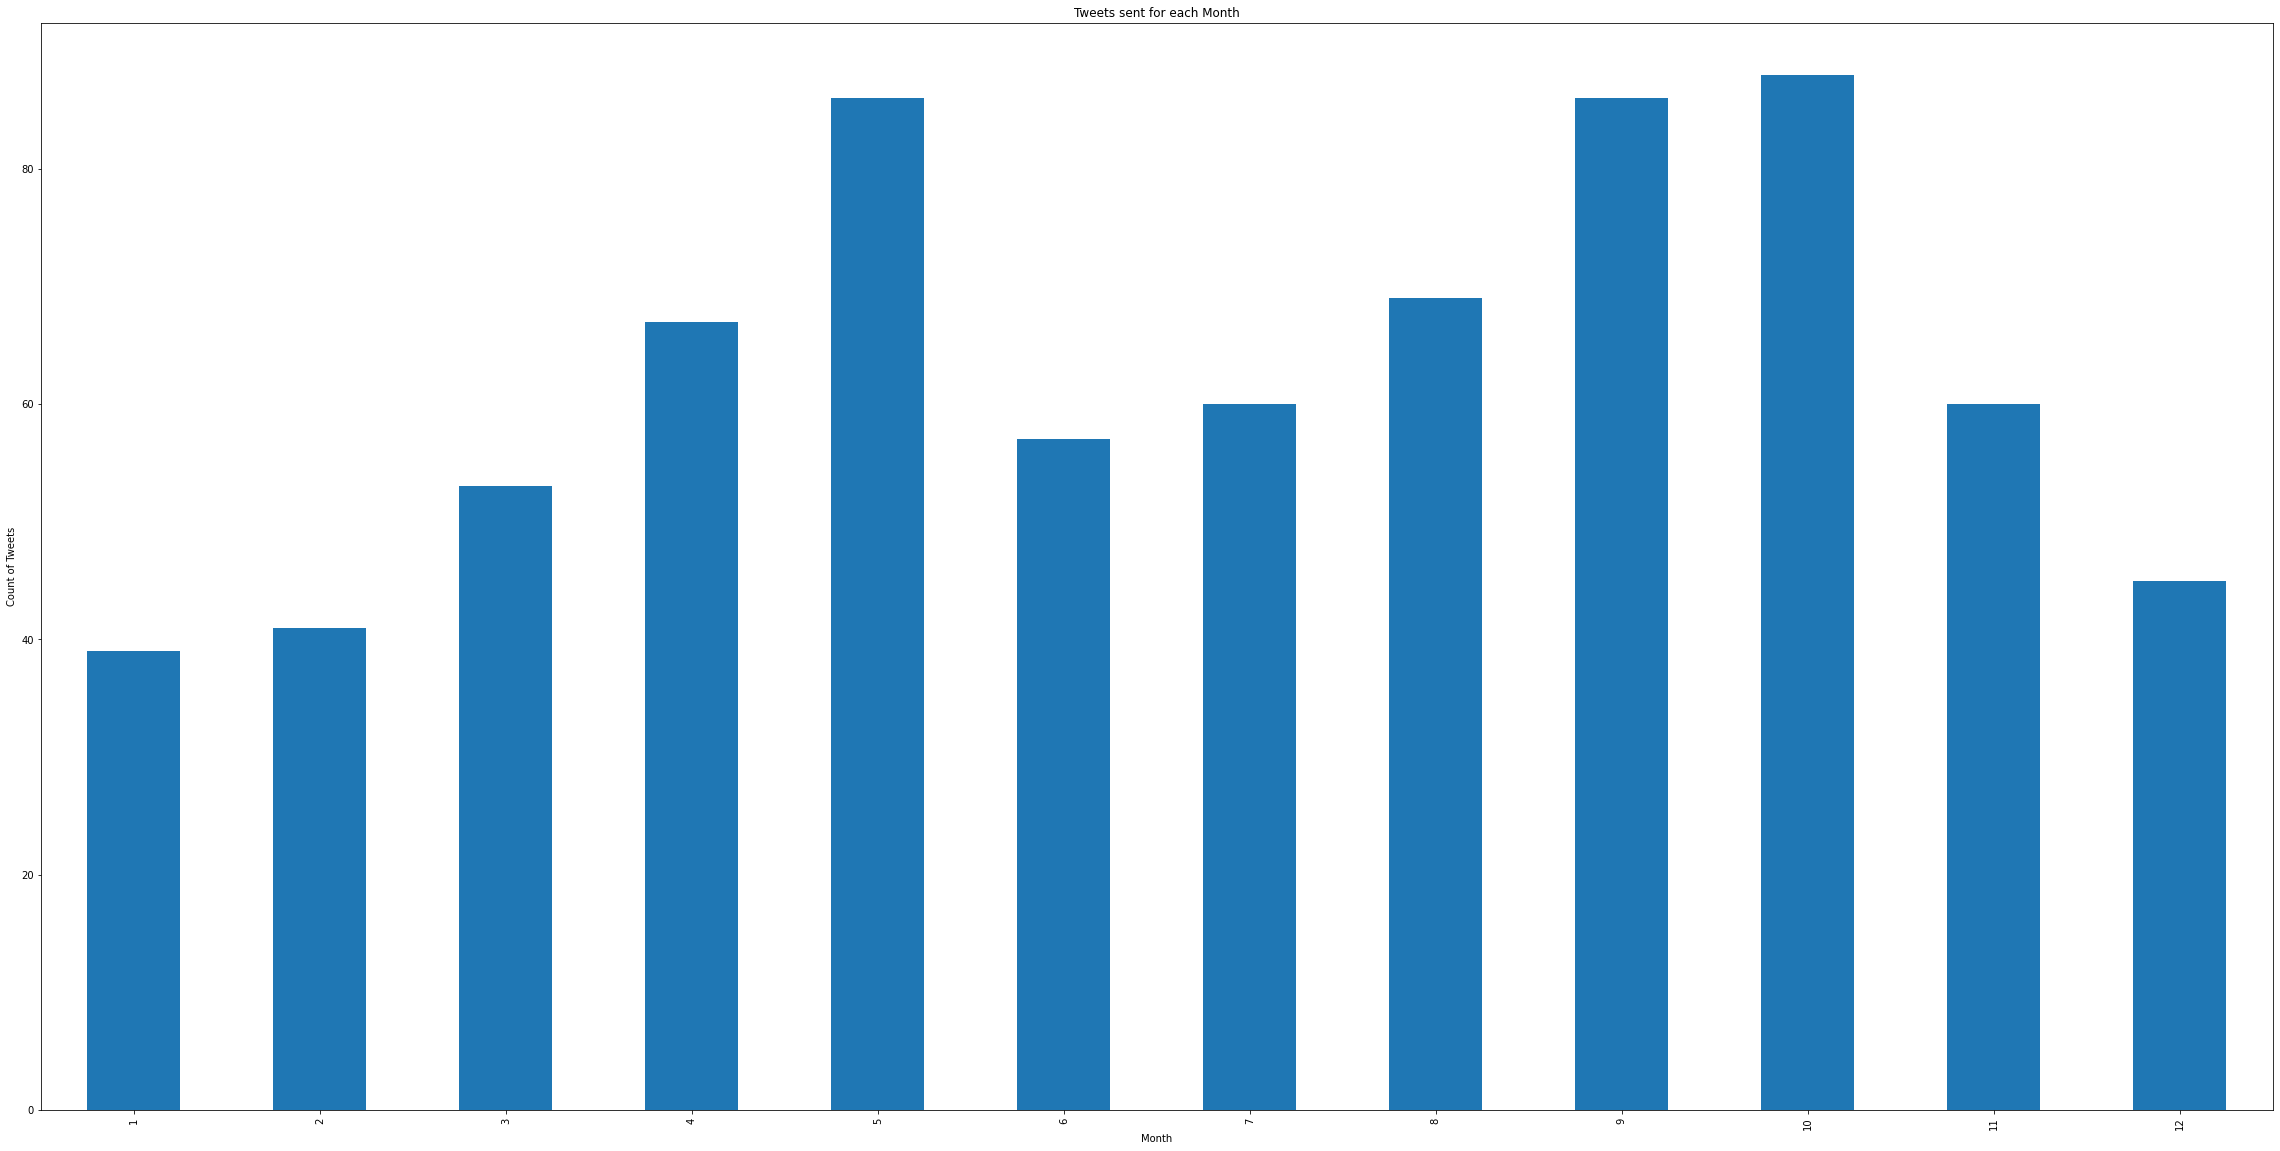

In [ ]:
tweets_df1=tweets_df.rename(columns={0:'date'})
tweets_df1['month'] = tweets_df1['date'].dt.month
plt.figure(figsize=(40,20))
tweets_df1['month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count of Tweets')
plt.title('Tweets sent for each Month')
plt.show()



It appears that October is the most popular month to tweet for Toys R Us. This is most likely due to black friday promotions but also for Holiday shopping. However, it is interesting that September and May have the second two largest counts since you would think that Toy's R Us would be promoting their toys more during the month of November or Decemeber for last minute holiday shopping.

In [ ]:
#question 4. Which twitter username has mentioned phoenixrising the most in the 500 most recent mentioned tweets?
text_query = 'phoenixrising'
max_tweets = 500
 
# Creation of query method using parameters
tweets = tweepy.Cursor(api.search,q=text_query).items(max_tweets)
 
# Pulling information from tweets iterable object
# Add or remove tweet information you want in the below list comprehension
tweets_list = [[tweet.text, tweet.created_at, tweet.id_str, tweet.user.name, tweet.user.screen_name, tweet.user.id_str, tweet.user.location, tweet.user.url, tweet.user.description, tweet.user.verified, tweet.user.followers_count, tweet.user.friends_count, tweet.user.favourites_count, tweet.user.statuses_count, tweet.user.listed_count, tweet.user.created_at, tweet.user.profile_image_url_https, tweet.user.default_profile, tweet.user.default_profile_image] for tweet in tweets]
 
# Creation of dataframe from tweets_list
# Did not include column names to simplify code 
tweets_df = pd.DataFrame(tweets_list)
tweets_df=tweets_df.rename(columns={4:'username'})
tweets_df

,0,1,2,3,username,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Great to run into @ElonPhoenix Hall of Famer and @DatawIslandSC member Larry Trautwein today as we get ready to sta… https://t.co/aPiDHIfXAv,2021-04-24 17:18:05,1386006545662717954,Elon Golf,ElonGolf,1705680906,"Elon, NC",https://t.co/HfxTCWF93N,Official Twitter of @elonuniversity men's and women's golf. #phoenixrising #ElonGolf,False,977,435,824,2327,18,2013-08-27 22:06:10,https://pbs.twimg.com/profile_images/1235973948434722817/2UpShSo5_normal.jpg,True,False
1,"RT @ElonBaseball: 🗣 ""Hey Alexa, play My Hero by the Foo Fighters""\n\n#phoenixrising #elonbaseball https://t.co/tpXMdno31O",2021-04-24 16:53:02,1386000241724436480,Mason Levin,mlev_24,2350544176,"Potomac, MD",https://t.co/bFwdIUYAOW,St. Andrews’s | @ElonBaseball,False,186,83,130,101,0,2014-02-18 12:39:48,https://pbs.twimg.com/profile_images/1320503628306763779/glW3X5gf_normal.jpg,True,False
2,RT @ElonWSoccer: Congratulations to defender Kayla Hodges on being named to the @TopDrawerSoccer Women's Team of the Week! \n\n📰 | https://t.…,2021-04-24 16:31:38,1385994856162463748,Mia Sky Davidson,MIASKY3332,715169352,,https://t.co/ScNVY5d91C,"Mississippi State Softball #33 |• NC • 🦋 AW, RD, MD, EM 🦋 #LoveisLiving",False,2255,1353,58292,18421,6,2012-07-25 00:23:29,https://pbs.twimg.com/profile_images/1376294200325636097/15uYygcj_normal.jpg,False,False
3,RT @ElonWSoccer: Congratulations to defender Kayla Hodges on being named to the @TopDrawerSoccer Women's Team of the Week! \n\n📰 | https://t.…,2021-04-24 16:28:05,1385993959030378499,Elon7amTailgate Crew,Elon7amTailgate,2822055456,Elon NC,None,Living the Maroon Life with emphasis on tailgating. 2017 BigTailgate Tour/David Glenn Show Tailgaters of the Year.,False,915,1152,8657,3629,5,2014-09-20 14:57:43,https://pbs.twimg.com/profile_images/914124690737827841/ssr93y6K_normal.jpg,True,False
4,"RT @ElonBaseball: With rain in the forecast all day tomorrow, Elon and UNCW will play a DH on Sunday starting at 12 p.m.\n\n#phoenixrising #e…",2021-04-24 16:06:27,1385988515922681867,Javik Blake,javblake8,4799442714,MA | NC,https://t.co/KvqhaV6ln8,"Elon ‘23 // Baseball Nerd // PxP: @ElonPhoenix, @RockersBaseball // Sports Director: @wsoe893 // ‘20 @STAAtalent Nantz Award Top 10",False,614,996,24969,5596,4,2016-01-22 19:35:48,https://pbs.twimg.com/profile_images/1378829028921073664/rxRzWokN_normal.jpg,False,False
5,DOOFUS DOUG DUCEY is a Democrat in RINO clothing who will never hold public office again after #phoenixrising https://t.co/iZdnucUO6K,2021-04-24 15:47:57,1385983862946222089,DEBRA LEE,Catwoman_1984,217159658,"Rocklin, CA",None,"Magazine Publisher, Writer, Marketing Communications (retired) * Stock Trader * Spiritualist * Conservative * Pink Floyd * 1stAmendment * https://t.co/3VqCjUmXTk: @Catwoman2011",False,1544,1179,51502,104377,103,2010-11-18 19:05:32,https://pbs.twimg.com/profile_images/3348373478/c25782309ebe73629c15bfe5362f716c_normal.jpeg,False,False
6,40 days &amp; 40 nights...\nWill feel like a year!\n#phoenixrising =^.^= https://t.co/ioQE41W3e0,2021-04-24 15:35:42,1385980780111818755,DEBRA LEE,Catwoman_1984,217159658,"Rocklin, CA",None,"Magazine Publisher, Writer, Marketing Communications (retired) * Stock Trader * Spiritualist * Conservative * Pink Floyd * 1stAmendment * https://t.co/3VqCjUmXTk: @Catwoman2011",False,1544,1179,51502,104377,103,2010-11-18 19:05:32,https://pbs.twimg.com/profile_images/3348373478/c25782309ebe73629c15bfe5362f716c_normal.jpeg,False,False
7,RT @ElonWSoccer: Congratulations to defender Kayla Hodges on being named to the @TopDrawerSoccer Women's Team of the Week! \n\n📰 | https://t.…,2021-04-24 15:29:42,1385979269957013508,11,payton_wilson21,1042709779,"Raleigh, NC",None,GOD GOT ME | #BLM🖤,False,3611,266,3923,1815,18,2012-12-28 17:20:35,https://pbs.twimg.com/profile_images/1330271005567307780/UjaFnX1C_normal.jpg,True,False
8,RT @ElonBaseball: FINAL | The hair...it's got to be the hair. 🦸‍♂️\n\n#phoenixrising #elonbaseball https://t.co/LJBC

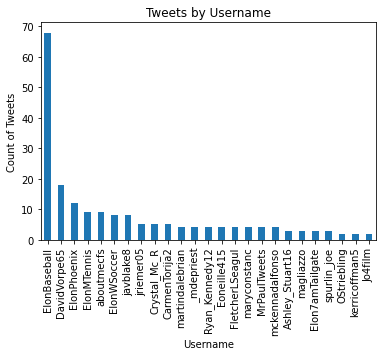

In [ ]:
tweets_df['username'].value_counts()[:25].plot(kind='bar')
plt.xlabel('Username')
plt.ylabel('Count of Tweets')
plt.title('Tweets by Username')
plt.show()

It appears that Elon Baseball significantly mentiones phoenixrising the most by at least 3x more than the rest of the users. We thought that it was interesting that Elon University was not a part of the most popular usernames to mention phoenixrising since some unknown usernames were more likely to mention it. 

In [ ]:
#Question 5. What is the relationship between number of followers and amount of favorites for users that mentioned Pepsi in the last 500 tweets?
text_query = 'pepsi'
max_tweets = 500
 
# Creation of query method using parameters
tweets = tweepy.Cursor(api.search,q=text_query).items(max_tweets)
 
# Pulling information from tweets iterable object
# Add or remove tweet information you want in the below list comprehension
tweets_list = [[tweet.text, tweet.created_at, tweet.id_str, tweet.user.name, tweet.user.screen_name, tweet.user.id_str, tweet.user.location, tweet.user.url, tweet.user.description, tweet.user.verified, tweet.user.followers_count, tweet.user.friends_count, tweet.user.favourites_count, tweet.user.statuses_count, tweet.user.listed_count, tweet.user.created_at, tweet.user.profile_image_url_https, tweet.user.default_profile, tweet.user.default_profile_image] for tweet in tweets]
 
# Creation of dataframe from tweets_list
# Did not include column names to simplify code 
tweets_df = pd.DataFrame(tweets_list)
tweets_df=tweets_df.rename(columns={4:'username'})
tweets_df

,0,1,2,3,username,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,RT @kekeloverh: Pepsi o coca cola \n\n#SenÇalKapımı,2021-04-24 17:48:51,1386014286263226374,Analia,anap689,830423355073429504,"Puerto Madryn, Argentina",None,,False,68,184,3480,1662,0,2017-02-11 14:28:51,https://pbs.twimg.com/profile_images/1365134477140381697/FQuoxiEg_normal.jpg,True,False
1,dondurmam fantalı pepsi daha mantıklı ab https://t.co/WClU2YR3bY,2021-04-24 17:48:45,1386014261017784320,M Σ Γ Τ,TheByKrdw,1203650190768508928,"Gaziantep, Türkiye",https://t.co/nPBRZVgTwR,"hayat olmuş yaşam maşam, amınıza koyim sabah akşam.\nsc| thebykrdwx",False,135,341,6018,1442,0,2019-12-08 12:19:13,https://pbs.twimg.com/profile_images/1371924985036562438/INxd5v6F_normal.jpg,True,False
2,eu acredito na supremacia da pepsi twist,2021-04-24 17:48:44,1386014259155460097,hofmann,Hofmann_,4050071823,supremacia dos sapos,None,meu corpo é um templo e só a @giceratopss tem a chave\nicon: @htxmellado\n\nele/dele,False,146,701,41810,8934,0,2015-10-27 01:36:37,https://pbs.twimg.com/profile_images/1376691838761963521/Mp5pG3lj_normal.jpg,False,False
3,@therikjonn Mines Pepsi flavored,2021-04-24 17:48:32,1386014207477309442,Robot 🔫🤖,youngrobot5,1229927106,,None,Frontman of A Week In New York and DJ at KWSB 91.1fm,False,45,39,6564,739,0,2013-03-01 14:18:35,https://pbs.twimg.com/profile_images/1262881363469889536/r2Z87kj1_normal.jpg,True,False
4,"RT @diorrseokjin: BTS-- Coca cola, Hyundai, Louis Vuitton, Samsung, Smart\n\nBLACKPINK- Celine, Chanel, YSL, Dior, Pepsi, Kia, Globe\n\nHaters…",2021-04-24 17:48:30,1386014200477061120,New,New64704572,999619411093868544,,None,BLACKPINK 🖤💗,False,150,247,56496,48960,0,2018-05-24 11:53:34,https://pbs.twimg.com/profile_images/1383825750634110981/yplpEPG1_normal.jpg,True,False
5,@_TheNewMind A bottle of Pepsi is 150.,2021-04-24 17:48:20,1386014157288390661,Young Woman.,clarah_fransis,847832333369659392,Under God's wings,None,Child of God/ Tailor/ Akara Advocate/ Hopeless Romantic.,False,4962,3509,169931,31918,3,2017-03-31 15:25:55,https://pbs.twimg.com/profile_images/1382388658305691649/gqnMO3dv_normal.jpg,True,False
6,11. Never tried pepsi,2021-04-24 17:48:19,1386014150946607108,Revi64,Revi641,998259774327345153,Celeste Mountain,None,He/Him | Twitch Affiliate | Speedrunner (Multiple Games) | SMO Trickjumper | Celeste Enthusiast | Follow @Pear_SMO,False,407,366,507,4833,2,2018-05-20 17:50:51,https://pbs.twimg.com/profile_images/1331001900330864640/Bu2FZQu5_normal.jpg,True,False
7,@onlyturkishtv 2004 We Will Rock You pepsi reklamı 🔊🔊🎶\nhttps://t.co/jiNjrgI07E,2021-04-24 17:48:16,1386014138300776448,Merve Karaca,meervekaraca,377246825,,None,･ ｡ ☆∴｡ * ･ﾟ*｡★･ ･ *ﾟ｡ * ･ ﾟ*｡･ﾟ★｡ ☆ﾟ･｡°*. ﾟ * ﾟ｡·*･｡ ﾟ* ﾟ *.｡☆｡★ ･ * ☆ ｡･ﾟ*.｡ * ★ ﾟ･｡ * ｡ ･ ﾟ ｡,False,204,377,2830,2854,0,2011-09-21 08:06:44,https://pbs.twimg.com/profile_images/1374275387467907074/H564txPX_normal.jpg,False,False
8,RT @majestic_minal: Boycott Pepsi &amp; Coke as USA has refused to send our India the raw material for vaccine!! 🔥🔥,2021-04-24 17:48:00,1386014074174013440,never dare to mess with me,OmkarGorantla,472658988,"Hyderabad, India",None,National🇮🇳 Bhakt || Firm believer of धर्मो रक्षती रक्षितः || Hindus Lives Matter || Invaders should be thrown out || RTs are not endorsements ||,False,1035,5003,23050,13651,1,2012-01-24 05:17:03,https://pbs.twimg.com/profile_images/1371366217374601220/olGpeNer_normal.jpg,True,False
9,"@VesselMere But if we take calculation problems seriously, and conclude we still need a private sector for consume… https://t.co/j3RKgLw0wx",2021-04-24 17:47:37,1386013975834505226,Jonas 🌹,Jonas_Thiel_,1027149515000832001,"Schleswig-Holstein, Germany",None,(he/him) | live in Germany | socialist | study socio-economics at CAU Kiel,False,213,158,21517,18279,6,2018-08-08 11:08:22,https://pbs.twimg.com/profile_images/1311767121358135302/Wi_v8TwT_normal.jpg,False,False


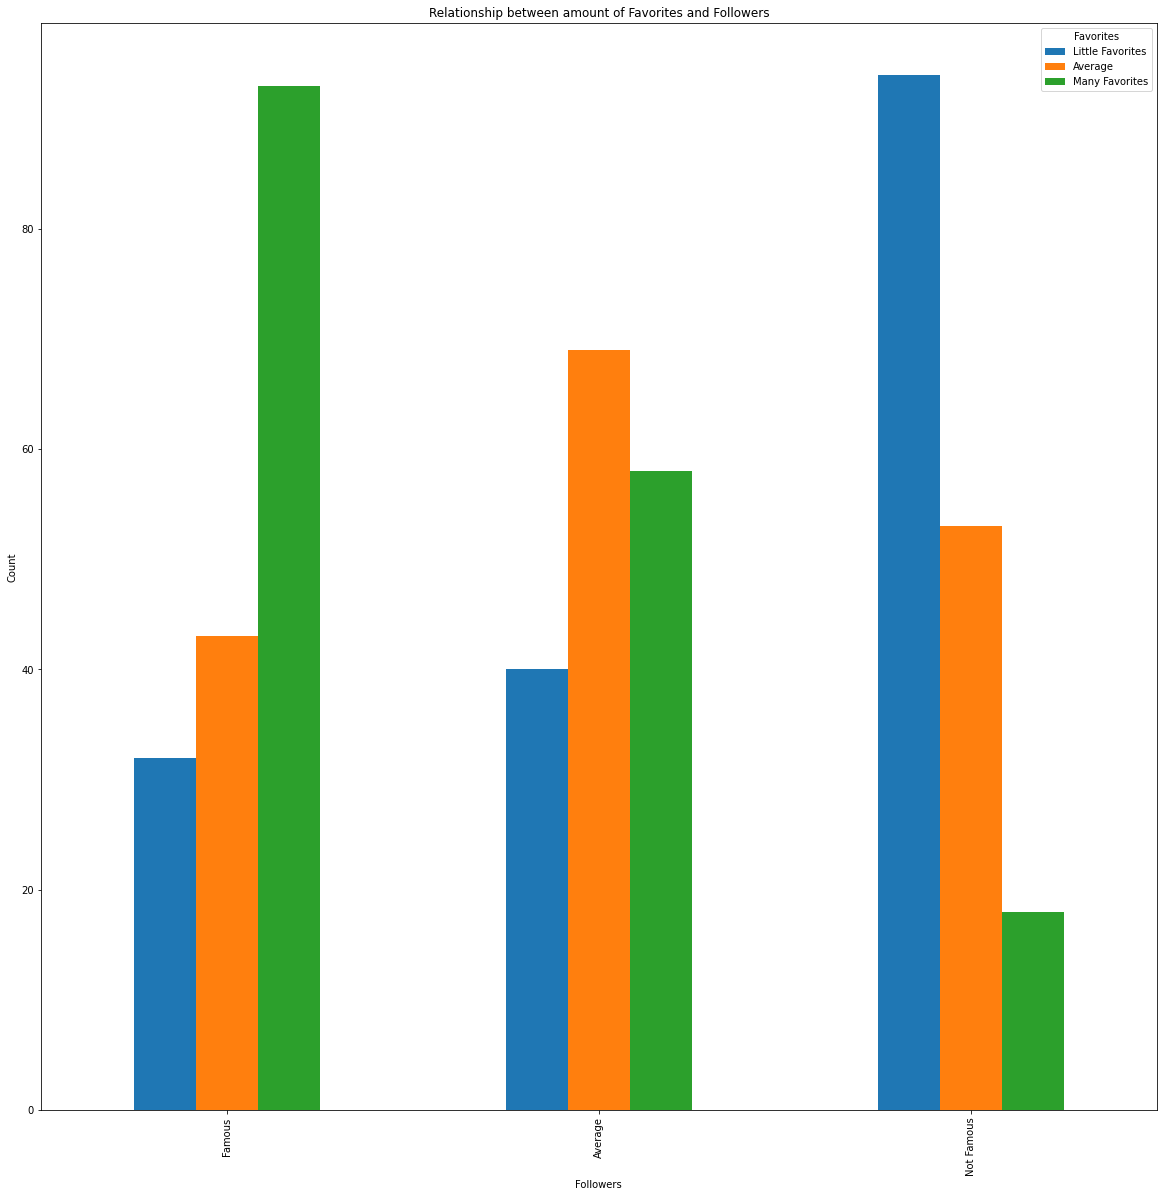

In [ ]:
tweets_df=tweets_df.rename(columns={12:'Favorites'})
tweets_df=tweets_df.rename(columns={10:'Followers'})
followers_cut = pd.qcut(tweets_df.Followers, [0, .33, .66, 1], labels=["Not Famous", "Average", "Famous"])
fav_cut = pd.qcut(tweets_df.Favorites, [0, .33, .66, 1], labels=["Little Favorites", "Average", "Many Favorites"])
bar = pd.crosstab(followers_cut, fav_cut,margins=True).sort_values('All',ascending=False)
bar= bar.drop('All',axis=1)
bar = bar.drop('All',axis=0)
bar.plot(kind='bar', stacked=False,figsize=(20,20))
plt.title('Relationship between amount of Favorites and Followers')
plt.xlabel('Followers')
plt.ylabel('Count')
plt.show()

As shown in the graph, users with more followers are more likely to recieve higher number of favorites compared to users with small follow count. This makes sense since people are more likely to like and share information from people that are considered "famous".